In [1]:
%matplotlib inline
%run //anaconda/lib/python2.7/chen_import.py
%run //anaconda/lib/python2.7/chen_pdf_analysis.py
%run //anaconda/lib/python2.7/chen_general_plotting.py

In [2]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from skimage import morphology
#import wcsaxes
from sklearn.linear_model import LinearRegression
from astrodendro import pruning, pp_catalog, ppv_catalog

from scimes import SpectralCloudstering
from itertools import cycle
from radfil import radfil_class, profile_tools

from fil_finder import fil_finder_2D
from scipy.interpolate import splprep
from scipy.interpolate import splev

from scipy import ndimage as ndi



from astropy.modeling import models, fitting, polynomial
from astropy.stats import sigma_clip

In [3]:
import sys
sys.path.insert(0, '/Users/hopechen/Documents/projects/git_projects/HCPy')

from HCPy import *

____
# Goal

This jupyter notebook is to test RadFil on KM's Orion finger data.

In [4]:
direcData = '/Users/hopechen/Documents/projects/git_projects/data/'
data = fits.open(direcData+'moment0_11_1stfinger_small.fits')[0]

image, header = data.data, data.header

In [5]:
lower = np.percentile(image, 75.)
mask = (image >= lower)

____
## RadFil

In [6]:
tt = time.time()
radfil = radfil_class.radfil(image, mask, header = header, distance = 414.)
print time.time() - tt

0.00102806091309


In [7]:
tt = time.time()
radfil.make_fil_spine(beamwidth = 6)
print time.time() - tt

0.781411886215


1.19946789742


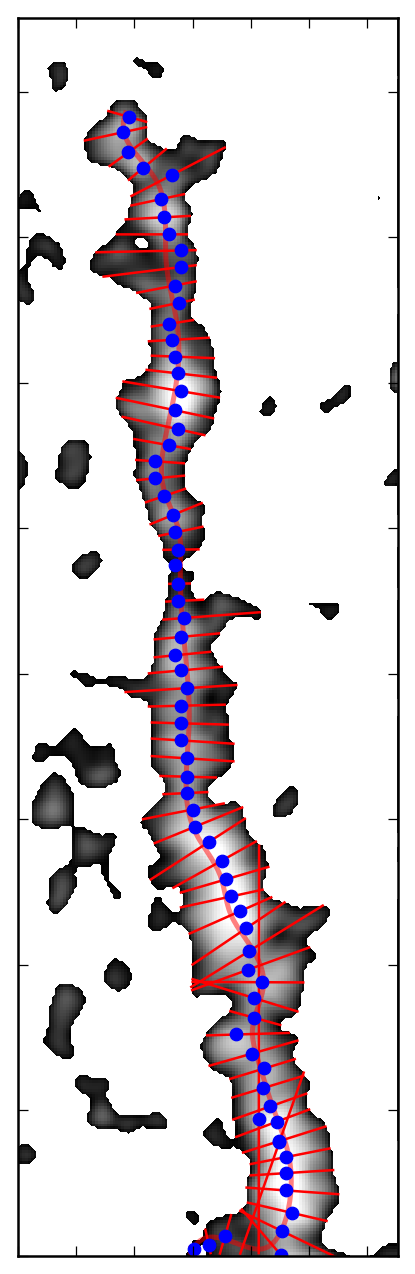

In [8]:
tt = time.time()
#radfil.build_profile(cutdist = 5., samp_int = 2, wrap = False, cut = True) ## this was for CZ's Fil 8
radfil.build_profile(cutdist=0.1, samp_int=6, bins=40, shift=True, wrap=False)
print time.time() - tt

==== Gaussian ====
amplitude: 1.279E+00
width: 0.009
Physical Size of the Beam: 0.0120427718388 pc
0.0777068138123


No background removal will be performed.


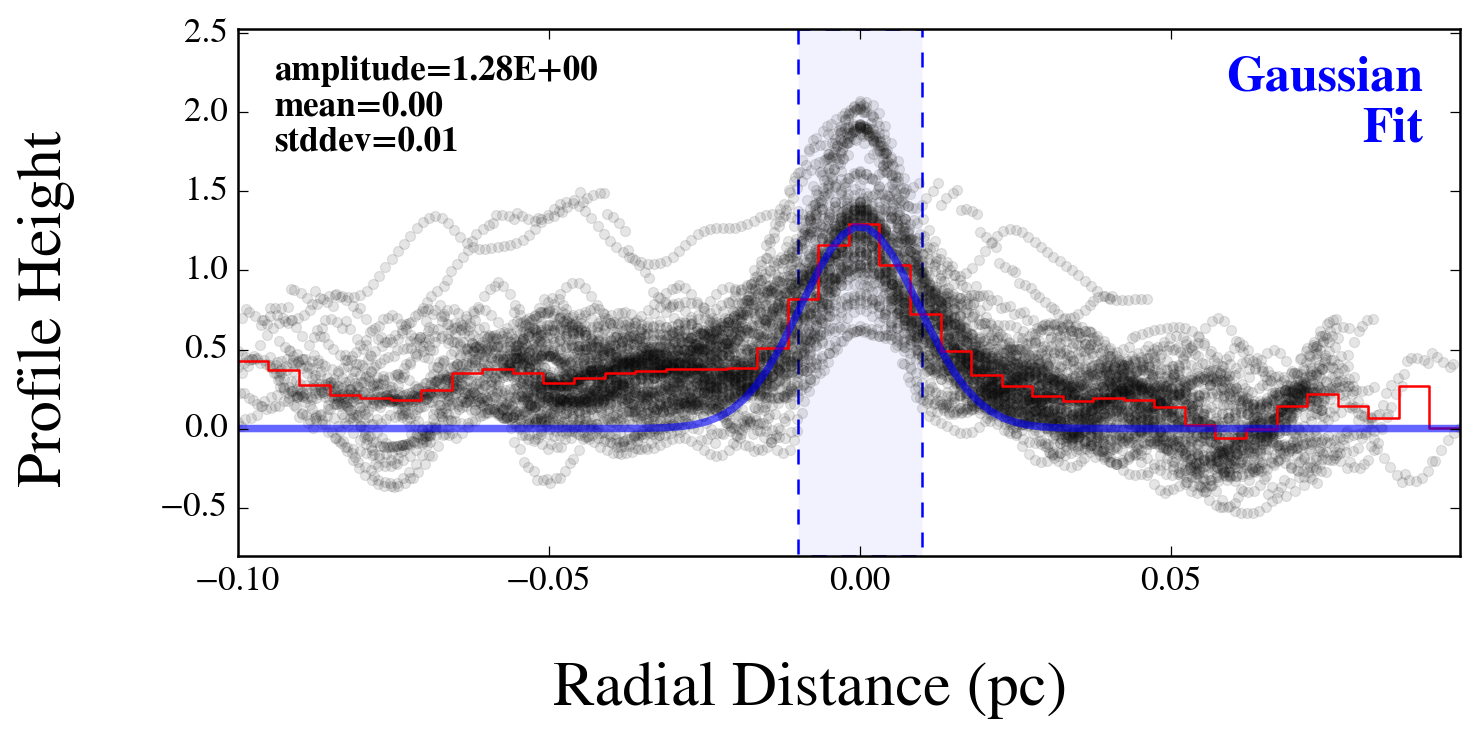

In [10]:
tt = time.time()
radfil.fit_profile(fitdist=0.01, fitfunc='Gaussian', verbose=True, beamwidth=6.)
print time.time() - tt

____
## PA vs. distance along the spline